## IMAGE RECOGNITION USING CONVOLUTIONAL NEURAL NETWORK

## IMPORTING LIBRARIES

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D

## LOAD THE DATASET

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print('Training images: {}'.format(X_train.shape))
print('Testing images: {}'.format(X_test.shape))

170508288/170498071 [==============================] - 13s 0us/step
Training images: (50000, 32, 32, 3)
Testing images: (10000, 32, 32, 3)




---



---



In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:

y_test = y_test.reshape(-1,)

### PLOTTING THE DATASET

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

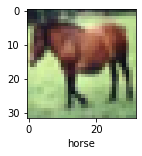

In [ ]:
plot_sample(X_train, y_train, 7)

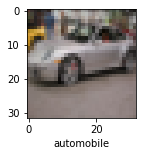

In [ ]:
plot_sample(X_train, y_train, 454)

In [ ]:
#create a grid of 3x3 images(9 images of 3x3 subplots)
for i in range(0,9):
    plt.subplot(330+1+i)#denotes 3x3 and postion
    img=X_train[i+50]#no need to transpose else transpose([1,2,0])
    plt.imshow(img)

plt.show()

## DATA PRE-PROCESSING & IMAGE AUGMENTATION

**Using Data generators**


Image augmentation artificially creates training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear and flips, etc

In [ ]:

datagen = ImageDataGenerator(
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
)

NORMALIZATION

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# ARTIFICIAL NEURAL NETWORK MODEL

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(datagen.flow(X_train, y_train), epochs=20)

Epoch 1/20
1563/1563 [==============================] - 29s 15ms/step - loss: 1.8789 - accuracy: 0.3256
Epoch 2/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.7233 - accuracy: 0.3882
Epoch 3/20
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6636 - accuracy: 0.4083
Epoch 4/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.6224 - accuracy: 0.4241
Epoch 5/20
1563/1563 [==============================] - 24s 16ms/step - loss: 1.5906 - accuracy: 0.4335
Epoch 6/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.5620 - accuracy: 0.4444
Epoch 7/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.5413 - accuracy: 0.4551
Epoch 8/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.5187 - accuracy: 0.4609
Epoch 9/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.5018 - accuracy: 0.4654
Epoch 10/20
1563/1563 [==============================] - 24s 16m

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.64      0.61      1000
           1       0.63      0.69      0.66      1000
           2       0.50      0.33      0.40      1000
           3       0.43      0.28      0.34      1000
           4       0.50      0.44      0.47      1000
           5       0.49      0.38      0.43      1000
           6       0.63      0.57      0.60      1000
           7       0.43      0.78      0.55      1000
           8       0.70      0.65      0.67      1000
           9       0.55      0.66      0.60      1000

    accuracy                           0.54     10000
   macro avg       0.55      0.54      0.53     10000
weighted avg       0.55      0.54      0.53     10000



In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________




---



---



# CONVOLUTIONAL NEURAL NETWORK MODEL

In [ ]:
cnn1 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])



In [ ]:
cnn1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn1.fit(X_train, y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 16s 4ms/step - loss: 1.5590 - accuracy: 0.4264
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1914 - accuracy: 0.5754
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0425 - accuracy: 0.6354
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9429 - accuracy: 0.6707
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8790 - accuracy: 0.6951
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8212 - accuracy: 0.7135
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7711 - accuracy: 0.7312
Epoch 8/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7302 - accuracy: 0.7449
Epoch 9/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6912 - accuracy: 0.7600
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.65

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn1.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [ ]:
cnn1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 64)        

In [ ]:
cnn2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn2.fit(X_train, y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 6s 3ms/step - loss: 1.4481 - accuracy: 0.4758
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1047 - accuracy: 0.6117
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9871 - accuracy: 0.6550
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9080 - accuracy: 0.6830
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8456 - accuracy: 0.7051
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7892 - accuracy: 0.7267
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7374 - accuracy: 0.7443
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6868 - accuracy: 0.7618
Epoch 9/50
1563/1563 [==============================] - 5s 4ms/step - loss: 0.6504 - accuracy: 0.7741
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.610

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn2.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

# MODEL 2

In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
print(X_train[0].shape)#should be and is 32x32x3

(32, 32, 3)


In [ ]:
#create a grid of 3x3 images(9 images of 3x3 subplots)
for i in range(0,9):
    plt.subplot(330+1+i)#denotes 3x3 and postion
    img=X_train[i+50]#no need to transpose else transpose([1,2,0])
    plt.imshow(img)

plt.show()

In [ ]:
print(X_train[0])

In [ ]:
seed=6
np.random.seed(seed)

#again load the dataset as we set the random seed and not apllying any shuffling effects or random effects
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255(RGB) to 0.0-1.0
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255.0
X_test=X_test/255.0


In [ ]:
print(X_train[0])

In [ ]:
#hot encode outputs
Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)
num_classes=Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
from keras.models import Sequential
from keras.layers import Dropout,Activation,Conv2D,GlobalAveragePooling2D
#conv2d is the main convulational layer
from tensorflow.keras.optimizers import SGD
def allcnn(weights=None):
    #taking random weights ny default else usr passed pretrained weights

    model=Sequential()#we will be adding one layer after another

    #not the input layer but need to tell the conv. layer to accept input
    model.add(Conv2D(96,(3,3),padding='same',input_shape=(32,32,3)))#32x32x3 channels
    model.add(Activation('relu'))#required for each conv. layer
    model.add(Conv2D(96,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))#drop neurons randomly;helps the network generalize(prevent overfitting on training data) better so instead of having individual neurons
    #that are controlling specific classes/features, the features are spread out over the entire network

    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding='valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))

    #load the weights,if passed
    if weights:
        model.load_weights(weights)

    #return model
    return model

In [ ]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9
#no need for training parameters

# define weights and build model
weights='all_cnn_weights_0.9088_0.4994.hdf5'#KERAS format hdf5
#pretrained weights  that have already gone through the above press
model=allcnn(weights)

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#measure of model's perfrmane is accuracy

# print model summary
print (model.summary())

# test the model with pretrained weights
scores=model.evaluate(X_test,Y_test,verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 96)        2688      
                                                                 
 activation (Activation)     (None, 32, 32, 96)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 96)        83040     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 96)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 96)        83040     
                                                                 
 dropout (Dropout)           (None, 16, 16, 96)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 192)       1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


None
313/313 [==============================] - 12s 7ms/step - loss: 0.5152 - accuracy: 0.9088
Accuracy: 90.88%


# Predicting the output

In [ ]:
classes=range(0,10)#10 not included

names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# zip the names and classes to make a dictionary of class_labels
class_labels=dict(zip(classes,names))
print(class_labels)
# generate batch of 9 images to predict
batch=X_test[200:209]
labels=np.argmax(Y_test[200:209],axis=-1)

#make predictions
predictions=model.predict(batch,verbose=1)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
1/1 [==============================] - 0s 22ms/step


In [ ]:
print(predictions)
print(predictions.shape)

[[1.21153304e-15 1.06742126e-16 1.42194789e-11 3.57047043e-07
  8.18853735e-11 9.99999642e-01 4.77345756e-13 1.19800947e-12
  2.26931085e-16 2.06221040e-13]
 [6.42615078e-07 9.99756873e-01 8.07883274e-12 2.06028094e-11
  1.13836772e-12 2.38496072e-13 9.10385916e-13 1.57554681e-11
  1.69888281e-08 2.42482245e-04]
 [3.62077918e-16 1.69335936e-15 1.61794438e-28 7.13783765e-27
  2.73488739e-26 1.14787774e-26 1.14460645e-27 7.17664883e-23
  1.00000000e+00 5.21244018e-20]
 [7.17007129e-13 1.59407246e-16 3.21780617e-16 6.96209548e-11
  9.31447453e-09 8.77943648e-07 1.15529483e-14 9.99999166e-01
  4.72989112e-20 2.03012622e-16]
 [2.63875219e-23 1.00000000e+00 3.53264490e-30 1.98868532e-29
  3.49747554e-29 4.32104682e-29 1.46093530e-17 1.09631058e-28
  2.98740560e-24 3.76287915e-14]
 [1.37087536e-21 3.62404120e-23 1.64337976e-20 1.00000000e+00
  1.23839605e-16 2.60282160e-08 6.20974722e-19 1.80729493e-15
  4.34706417e-24 2.06645408e-22]
 [9.89781022e-01 6.42519371e-12 5.44721445e-07 1.55294549e

In [ ]:
#these are individual class probabilities, should sum to 1.0
for image in predictions:
    print(np.sum(image))

#shows that there is hundred percent probability that images to belong to one of the classes

1.0
1.0
1.0
1.0
1.0
1.0
1.0000001
1.0
1.0


In [ ]:
# use np.argmax() to convert class probabilities to class labels
class_result=np.argmax(predictions,axis=-1)
print(class_result)

[5 1 8 7 1 3 0 5 7]


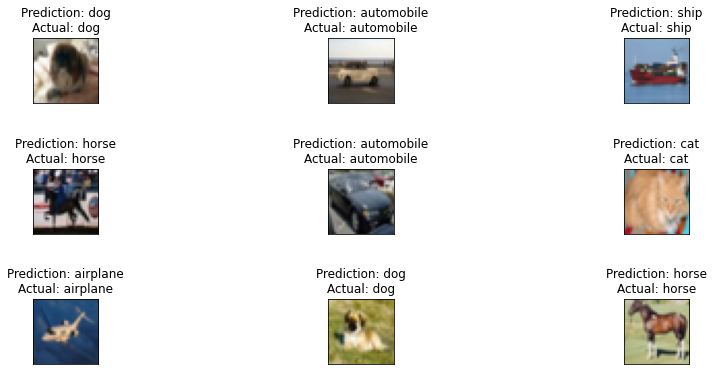

In [ ]:
#create a grid of 3x3 images
fig,axs=plt.subplots(3,3,figsize=(15,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i,img in enumerate (batch):
        # determine label for each prediction, set title
        for key,value in class_labels.items():
            if class_result[i]==key:
                title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
                axs[i].set_title(title)
                axs[i].axes.get_xaxis().set_visible(False)
                axs[i].axes.get_yaxis().set_visible(False)

        # plot the image
        axs[i].imshow(img)

# show the plot
plt.show()